In [3]:
import pandas as pd
import numpy as np
import rdkit.Chem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
import importer
import analyser
from analysis_methods import AnalysisMethods
import matplotlib.pyplot as plt

In [4]:
df_assay, df_compounds = importer.import_data('./data/activity_data.csv')
df_compounds = pd.DataFrame(df_compounds)

In [5]:
#Calculate and populate df with Lipinski parameters

H_acc_list, H_don_list, MW_list, logP_list = [], [], [], []
for i in df_compounds['SMILES']:
    m = Chem.MolFromSmiles(i)
    H_acc_list.append(Descriptors.NumHAcceptors(m))
    H_don_list.append(Descriptors.NumHDonors(m))
    MW_list.append(Descriptors.ExactMolWt(m))
    logP_list.append(Descriptors.MolLogP(m))

df_compounds['H_acceptors'] = H_acc_list
df_compounds['H_donors'] = H_don_list
df_compounds['MW'] = MW_list
df_compounds['LogP'] = logP_list

df_compounds


,SMILES,H_acceptors,H_donors,MW,LogP
0,CCn1nccc1C(=O)N1Cc2ccc(Cl)cc2C2(CCN(c3cncc4ccc...,5,0,485.161853,4.43530
1,Cc1cnn(C)c1C(=O)N1Cc2ccc(Cl)cc2C2(CCN(c3cncc4c...,5,0,485.161853,4.26082
2,Cc1cc(C(=O)N2Cc3ccc(Cl)cc3C3(CCN(c4cncc5ccccc4...,5,0,485.161853,4.26082
3,O=C(Nc1cncc2c1CCCC2)[C@H]1CNS(=O)(=O)c2ccc(Cl)...,4,2,391.075740,2.62800
4,O=C(Nc1cncc2c1CCCC2)[C@@H]1CNS(=O)(=O)c2ccc(Cl...,4,2,391.075740,2.62800
...,...,...,...,...,...
2032,N#Cc1cc(Cl)cc(NC(=O)Nc2cccnc2)c1,3,2,272.046489,3.25068
2033,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,4,3,253.096360,2.17948
2034,N#Cc1cccc(NC(=O)Nc2c[nH]c3ncccc23)c1,3,3,277.096360,3.07858
2035,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,3,1,287.105862,3.28768


In [6]:
#Calculate additional features for training (should probably add more, but its a start)

Heavy_atoms, Heavy_atoms_mw, NHOH, NO = [], [], [], []
Rotatable_bonds, Valence_e, rings, TPSA = [], [], [], []
for i in df_compounds['SMILES']:
    m = Chem.MolFromSmiles(i)
    Heavy_atoms.append(Descriptors.HeavyAtomCount(m))
    Heavy_atoms_mw.append(Descriptors.HeavyAtomMolWt(m))
    NHOH.append(Descriptors.NHOHCount(m))
    NO.append(Descriptors.NOCount(m))
    TPSA.append(Descriptors.TPSA(m))
    Rotatable_bonds.append(Descriptors.NumRotatableBonds(m))
    Valence_e.append(Descriptors.NumValenceElectrons(m))
    rings.append(Descriptors.RingCount(m))

df_compounds['Heavy_atoms'] = Heavy_atoms
df_compounds['Heavy_atom_mw'] = Heavy_atoms_mw
df_compounds['NHOH_count'] = NHOH
df_compounds['NO_count'] = NO
df_compounds['Rotatable_bonds'] = Rotatable_bonds
df_compounds['Valence_electonrs'] = Valence_e
df_compounds['Rings'] = rings
df_compounds['TPSA'] = TPSA

df_compounds

,SMILES,H_acceptors,H_donors,MW,LogP,Heavy_atoms,Heavy_atom_mw,NHOH_count,NO_count,Rotatable_bonds,Valence_electonrs,Rings,TPSA
0,CCn1nccc1C(=O)N1Cc2ccc(Cl)cc2C2(CCN(c3cncc4ccc...,5,0,485.161853,4.43530,35,461.783,0,7,3,176,6,71.33
1,Cc1cnn(C)c1C(=O)N1Cc2ccc(Cl)cc2C2(CCN(c3cncc4c...,5,0,485.161853,4.26082,35,461.783,0,7,2,176,6,71.33
2,Cc1cc(C(=O)N2Cc3ccc(Cl)cc3C3(CCN(c4cncc5ccccc4...,5,0,485.161853,4.26082,35,461.783,0,7,2,176,6,71.33
3,O=C(Nc1cncc2c1CCCC2)[C@H]1CNS(=O)(=O)c2ccc(Cl)...,4,2,391.075740,2.62800,26,373.736,2,6,2,136,4,88.16
4,O=C(Nc1cncc2c1CCCC2)[C@@H]1CNS(=O)(=O)c2ccc(Cl...,4,2,391.075740,2.62800,26,373.736,2,6,2,136,4,88.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,N#Cc1cc(Cl)cc(NC(=O)Nc2cccnc2)c1,3,2,272.046489,3.25068,19,263.623,2,5,2,94,2,77.81
2033,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,4,3,253.096360,2.17948,19,242.177,4,6,2,94,2,103.83
2034,N#Cc1cccc(NC(=O)Nc2c[nH]c3ncccc23)c1,3,3,277.096360,3.07858,21,266.199,3,6,2,102,3,93.60
2035,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,3,1,287.105862,3.28768,22,274.218,1,4,3,106,3,65.78


In [7]:
fingerprints = []
for i in df_compounds['SMILES']:
    m = Chem.MolFromSmiles(i)
    fingerprints.append(AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048))

df_compounds['fingerprint'] = fingerprints
df_compounds
    

,SMILES,H_acceptors,H_donors,MW,LogP,Heavy_atoms,Heavy_atom_mw,NHOH_count,NO_count,Rotatable_bonds,Valence_electonrs,Rings,TPSA,fingerprint
0,CCn1nccc1C(=O)N1Cc2ccc(Cl)cc2C2(CCN(c3cncc4ccc...,5,0,485.161853,4.43530,35,461.783,0,7,3,176,6,71.33,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Cc1cnn(C)c1C(=O)N1Cc2ccc(Cl)cc2C2(CCN(c3cncc4c...,5,0,485.161853,4.26082,35,461.783,0,7,2,176,6,71.33,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Cc1cc(C(=O)N2Cc3ccc(Cl)cc3C3(CCN(c4cncc5ccccc4...,5,0,485.161853,4.26082,35,461.783,0,7,2,176,6,71.33,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,O=C(Nc1cncc2c1CCCC2)[C@H]1CNS(=O)(=O)c2ccc(Cl)...,4,2,391.075740,2.62800,26,373.736,2,6,2,136,4,88.16,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,O=C(Nc1cncc2c1CCCC2)[C@@H]1CNS(=O)(=O)c2ccc(Cl...,4,2,391.075740,2.62800,26,373.736,2,6,2,136,4,88.16,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,N#Cc1cc(Cl)cc(NC(=O)Nc2cccnc2)c1,3,2,272.046489,3.25068,19,263.623,2,5,2,94,2,77.81,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2033,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,4,3,253.096360,2.17948,19,242.177,4,6,2,94,2,103.83,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2034,N#Cc1cccc(NC(=O)Nc2c[nH]c3ncccc23)c1,3,3,277.096360,3.07858,21,266.199,3,6,2,102,3,93.60,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2035,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,3,1,287.105862,3.28768,22,274.218,1,4,3,106,3,65.78,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [8]:
df_assay

,CID,canonical_CID,r_inhibition_at_20_uM,r_inhibition_at_50_uM,r_avg_IC50,f_inhibition_at_20_uM,f_inhibition_at_50_uM,f_avg_IC50,f_avg_pIC50,relative_solubility_at_20_uM,relative_solubility_at_100_uM,trypsin_IC50,NMR_std_ratio,acrylamide,chloroacetamide,series,frag_id
0,MAT-POS-be048f2c-5,MAT-POS-be048f2c-5,NaN,NaN,NaN,NaN,NaN,0.297012,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
1,EDJ-MED-cc48ee33-4,EDJ-MED-cc48ee33-4,NaN,NaN,NaN,NaN,NaN,0.682988,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
2,EDJ-MED-cc48ee33-5,EDJ-MED-cc48ee33-5,NaN,NaN,NaN,NaN,NaN,0.463982,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
3,MIK-UNK-58cd43d0-1,MIK-UNK-58cd43d0-1,NaN,NaN,NaN,NaN,NaN,0.723365,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
4,MIK-UNK-78dbf1b8-1,MIK-UNK-78dbf1b8-1,NaN,NaN,NaN,NaN,NaN,0.205139,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,WAR-XCH-eb7b662f-2,WAR-XCH-eb7b662f-2,NaN,NaN,NaN,NaN,NaN,99.010000,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN
2033,DAR-DIA-23aa0b97-8,DAR-DIA-23aa0b97-8,NaN,NaN,NaN,NaN,NaN,54.272964,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN
2034,DAR-DIA-23aa0b97-11,DAR-DIA-23aa0b97-11,NaN,NaN,NaN,NaN,NaN,63.554925,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN
2035,DAR-DIA-23aa0b97-19,DAR-DIA-23aa0b97-19,NaN,NaN,14.641091,NaN,NaN,26.680129,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN


In [9]:
df_assay['pIC50'] = AnalysisMethods.pIC50(df_assay)
df_assay

,CID,canonical_CID,r_inhibition_at_20_uM,r_inhibition_at_50_uM,r_avg_IC50,f_inhibition_at_20_uM,f_inhibition_at_50_uM,f_avg_IC50,f_avg_pIC50,relative_solubility_at_20_uM,relative_solubility_at_100_uM,trypsin_IC50,NMR_std_ratio,acrylamide,chloroacetamide,series,frag_id,pIC50
0,MAT-POS-be048f2c-5,MAT-POS-be048f2c-5,NaN,NaN,NaN,NaN,NaN,0.297012,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,0.527226
1,EDJ-MED-cc48ee33-4,EDJ-MED-cc48ee33-4,NaN,NaN,NaN,NaN,NaN,0.682988,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,0.165587
2,EDJ-MED-cc48ee33-5,EDJ-MED-cc48ee33-5,NaN,NaN,NaN,NaN,NaN,0.463982,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,0.333499
3,MIK-UNK-58cd43d0-1,MIK-UNK-58cd43d0-1,NaN,NaN,NaN,NaN,NaN,0.723365,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,0.140643
4,MIK-UNK-78dbf1b8-1,MIK-UNK-78dbf1b8-1,NaN,NaN,NaN,NaN,NaN,0.205139,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,0.687953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,WAR-XCH-eb7b662f-2,WAR-XCH-eb7b662f-2,NaN,NaN,NaN,NaN,NaN,99.010000,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN,-1.995679
2033,DAR-DIA-23aa0b97-8,DAR-DIA-23aa0b97-8,NaN,NaN,NaN,NaN,NaN,54.272964,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN,-1.734584
2034,DAR-DIA-23aa0b97-11,DAR-DIA-23aa0b97-11,NaN,NaN,NaN,NaN,NaN,63.554925,NaN,NaN,NaN,99.0,NaN,False,False,3-aminopyridine-like,NaN,-1.803149
2035,DAR-DIA-23aa0b97-19,DAR-DIA-23aa0b97-19,NaN,NaN,14.641091,NaN,NaN,26.680129,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN,-1.426188


(array([673., 199., 202., 221., 220., 193., 154.,  36.,   2.,   1.]),
 array([-2.29666519, -1.80961671, -1.32256822, -0.83551974, -0.34847126,
         0.13857723,  0.62562571,  1.1126742 ,  1.59972268,  2.08677116,
         2.57381965]),
 <BarContainer object of 10 artists>)

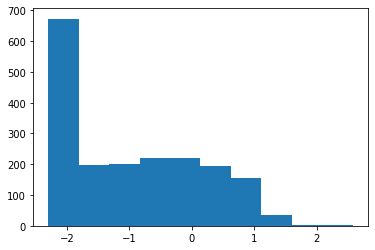

In [10]:
fix, ax = plt.subplots(1)
ax.hist(df_assay['pIC50'])

This isn't normally distrbibuted - therefore, could 'class_weight='balanced' - or, could use tree-based models that perform well on imbalanced datsets as their hierarchcial strucutre alllows them to learn signals from both classses

## Lipinski molecules

This section identifies all molecules that satisfy all criteria of Lipinski's rule of five - for bioavaliable small molecules

* 5 or fewer hydrogen bond donors;
* 10 or fewer hydrogen bond acceptors;
* A molecular weight (MW) of less than 500 Daltons;
* An octanol-water partition coefficient (log $P_{o/w}$) of less than 5. Larger log $P_{o/w}$ means
more lipophilic (i.e., less water soluble).



In [20]:
# Lipinski molecules

def lipinski_mol(df):
    """Determines whether a molecule in dataframe follows Lipinski rules"""
    few_hb_donor = (df["H_donors"] <= 5)
    few_hb_acceptor = (df["H_acceptors"] <= 10)
    low_MW = (df["MW"] < 500)
    low_pc = (df["LogP"] < 5) 
    return (few_hb_acceptor & few_hb_donor & low_MW & low_pc)

def select_lipinski(df, rule = lipinski_mol):
    """Removes compounds from database which don't follow Lipinski rules"""
    df_lip = analyser.analyse_compounds(df, df, 'lipinski_mol', rule)
    # df is passed twice, as it contains the data to operate on, and also is the dataframe to add output to
    df_lip.drop(df_lip[df_lip.lipinski_mol == False].index, inplace=True)
    df_lip.drop(columns = ['lipinski_mol'], inplace=True)  # As all values are now true so column is defunct
    return df_lip


df_lip_compounds = select_lipinski(df_compounds.copy())

print(f"Selected {df_lip_compounds.shape[0]} molecules out of {df_compounds.shape[0]}.")


Selected 1528 molecules out of 2037.


In [23]:
def select_lipinski_assay(df_c, df_a, rule = lipinski_mol):
    """Removes assay corresponding to compounds from database which don't follow Lipinski rules"""
    df_lip = analyser.analyse_compounds(df_c, df_c, 'lipinski_mol', rule)
    df_a['lipinski_mol'] = df_lip['lipinski_mol']
    df_a.drop(df_a[df_a.lipinski_mol == False].index, inplace=True)
    df_a.drop(columns = ['lipinski_mol'], inplace=True)  # As all values are now true so column is defunct
    return df_a

df_lip_assays = select_lipinski_assay(df_compounds.copy(), df_assay.copy())

print(f"Remaining: {df_lip_compounds.shape[0]} assays out of {df_compounds.shape[0]}.")

Remaining: 1528 assays out of 2037.


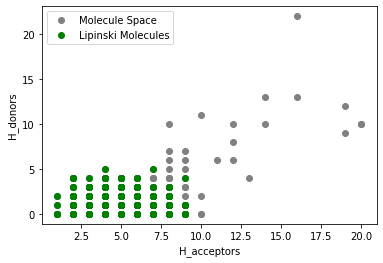

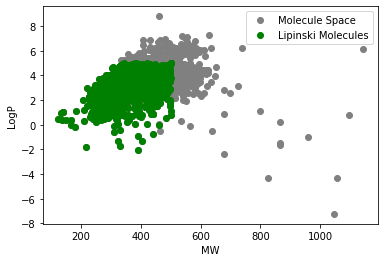

In [59]:
# Representation of Lipinski molecules in sample space

def compare_dataframe_pair(df_1, df_2, x_var, y_var, subset_name = 'Lipinski Molecules'):
    try:
        fig, ax = plt.subplots()
        df_1.plot(x=x_var, y=y_var, ax=ax, style='o', color = 'grey', label = 'Molecule Space')
        df_2.plot(x=x_var, y=y_var, ax=ax, style='o', color = 'g', label = subset_name) 
        ax.set_ylabel(y_var); ax.legend()
    except KeyError as k:
        print(f"Column name {k} does not exist in dataframe")
            

compare_dataframe_pair(df_compounds, df_lip_compounds, 'H_acceptors', 'H_donors')
compare_dataframe_pair(df_compounds, df_lip_compounds, 'MW', 'LogP')

Note that the MW and $P_{o/w}$ are the most significant factors in determining whether a molecule satifes the Lipinski conditions, with the hydrogen bond acceptor and donor limits ruling out very few molecules that have not been ruled out by these factors.

## Relaxed Lipinski conditions

We may also consider the subset of molecules that satisfy at least three of the Lipinski conditions, as shown below:

In [32]:
def relaxed_lipinski(df):
    """Determines whether a molecule in dataframe follows all but one Lipinski rules"""
    few_hb_donor = (df["H_donors"] <= 5) * 1  # (* 1) to convert to int
    few_hb_acceptor = (df["H_acceptors"] <= 10) * 1
    low_MW = (df["MW"] < 500) * 1
    low_pc = (df["LogP"] < 5) * 1
    accepted_cond = few_hb_acceptor + few_hb_donor + low_MW + low_pc
    return (accepted_cond >= 3)

df_rlip_compounds = select_lipinski(df_compounds.copy(), rule=relaxed_lipinski)

print(f"Selected {df_rlip_compounds.shape[0]} molecules out of {df_compounds.shape[0]}.")



Selected 1950 molecules out of 2037.


We see that this new criterion includes a further 422 molecules, compared to the stricter condition where all Lipinski conditions must be passed. We expect from our previous work that most of these new molecules will have broken the MW or $P_{o/w}$ conditions, but may verify this graphically.

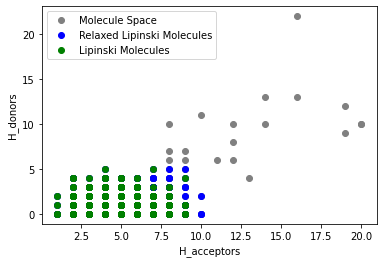

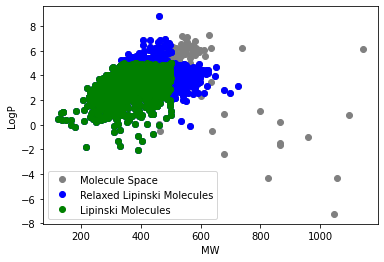

In [44]:
def compare_dataframe_trio(df_1, df_2, df_3, x_var, y_var):
    try:
        fig, ax = plt.subplots()
        df_1.plot(x=x_var, y=y_var, ax=ax, style='o', color = 'grey', label = 'Molecule Space')
        df_2.plot(x=x_var, y=y_var, ax=ax, style='o', color = 'blue', label = 'Relaxed Lipinski Molecules') 
        df_3.plot(x=x_var, y=y_var, ax=ax, style='o', color = 'g', label = 'Lipinski Molecules') 
        ax.set_ylabel(y_var); ax.legend()
    except KeyError as k:
        print(f"Column name {k} does not exist in dataframe")
            

compare_dataframe_trio(df_compounds, df_rlip_compounds, df_lip_compounds, 'H_acceptors', 'H_donors')
compare_dataframe_trio(df_compounds, df_rlip_compounds, df_lip_compounds, 'MW', 'LogP')

As expected, we see two new tranches of molecules (in blue) on the MW/$P_{o/w}$ plot, that have been accepted under the new relaxed conditions. In general, outliers that lie further from the main cluster have not been accepted - these heavier molecules are more likely to fail the hydrogben bond donor/acceptor conditions, as they contain more functional groups. 

We may also consider the distribution of these compounds across subspaces of other assay data:

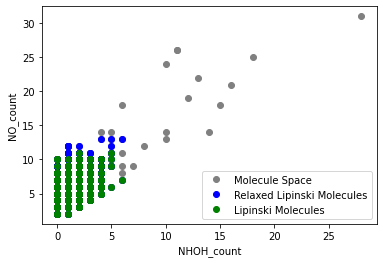

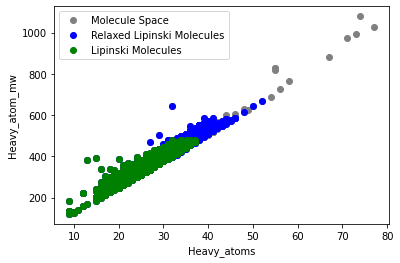

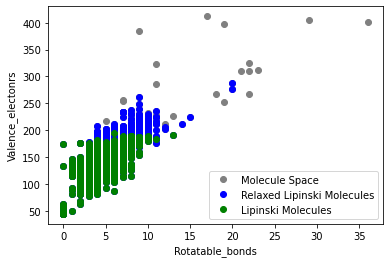

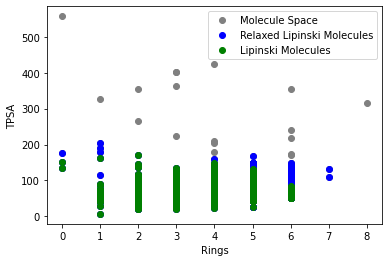

In [45]:
compare_dataframe_trio(df_compounds, df_rlip_compounds, df_lip_compounds, 'NHOH_count', 'NO_count')
compare_dataframe_trio(df_compounds, df_rlip_compounds, df_lip_compounds, 'Heavy_atoms', 'Heavy_atom_mw')
compare_dataframe_trio(df_compounds, df_rlip_compounds, df_lip_compounds, 'Rotatable_bonds', 'Valence_electonrs')
compare_dataframe_trio(df_compounds, df_rlip_compounds, df_lip_compounds, 'Rings', 'TPSA')

#tpsa is good, rings are not - compare tpsa to valence e?
#nhoh is h bond donor, no is hydrogen bond acceptor

In [35]:
print(df_lip_compounds.columns)


Index(['SMILES', 'H_acceptors', 'H_donors', 'MW', 'LogP', 'Heavy_atoms',
       'Heavy_atom_mw', 'NHOH_count', 'NO_count', 'Rotatable_bonds',
       'Valence_electonrs', 'Rings', 'TPSA', 'fingerprint'],
      dtype='object')


## Clustering 

We have computed ECFP (Morgan) fingerprints with radius 2 and 2048 bits for each of the Moonshot compounds. We will then cluster the compounds using the Tanimoto (a.k.a. Jaccard) index. 
The remove zero size clusters?
or remove zero variance bits and conduct pca analysis

In [36]:
#Define clustering setup
def ClusterFps(fps,cutoff=0.2):
    from rdkit import DataStructs
    from rdkit.ML.Cluster import Butina

    # first generate the distance matrix:
    dists = []
    nfps = len(fps)
    for i in range(1,nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fps[i],fps[:i])
        dists.extend([1-x for x in sims])

    # now cluster the data:
    cs = Butina.ClusterData(dists,nfps,cutoff,isDistData=True)
    return cs

In [37]:
clusters=ClusterFps(df_compounds['fingerprint'],cutoff=0.322)  # for 95% confidence that clusters are different


In [38]:
def cluster_size_dist(clusters):
    """ Records the size of each cluster.
    """
    cluster_sizes = []
    for cluster in clusters:
        cluster_sizes.append(len(cluster))
    return cluster_sizes

cluster_size_dist = cluster_size_dist(clusters)
print(f"Generated {len(clusters)} with mean occupancy of {sum(cluster_size_dist)/len(clusters):.2f} molecules")

Generated 911 with mean occupancy of 2.24 molecules


Our clustering algorithm has generated a large number of clusters, with very few molecules per cluster. What does this mean though - are our molecules evenly spread between clusters?

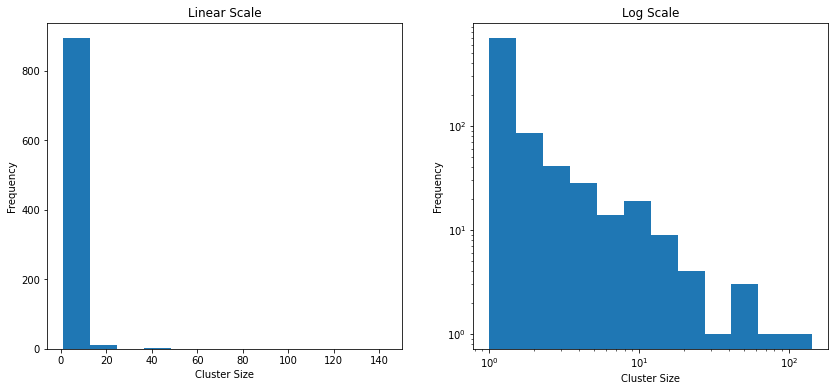

In [39]:
plt.figure(figsize=(14,6))
plt.subplot(121)
hist, bins, _ = plt.hist(cluster_size_dist, bins=12)
plt.xlabel('Cluster Size'); plt.ylabel('Frequency')
plt.title("Linear Scale")

plt.subplot(122)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(cluster_size_dist, bins=logbins)
plt.xscale('log'); plt.yscale('log')
plt.xlabel('Cluster Size'); plt.ylabel('Frequency')
plt.title("Log Scale")

plt.show()

From the linear histogram, it is clear that the vast majority of the clusters are small; in fact the log scale shows the frequency of clusters decreases almost exponentially with size. We believe this over-representation of small clusters is a result of an extremely diverse dataset, with many unique molecules unrelated to others in the dataset (and a small number of well clustered molecules, ie derived from the same scaffold).

In [40]:
# find features associated with the most common clusters, and display graphically.
# remove molecules in smallest clusters and recluster?
# or remove zero variance bits in fingerprint and repeat.

In [41]:
def find_max_cluster(clusters):
    """ Returns the largest cluster
    """
    max_cluster = ()
    for cluster in clusters:
        if len(cluster) > len(max_cluster):
            max_cluster = cluster
    return max_cluster

max_cluster = find_max_cluster(clusters)
print(f"The largest cluster has {len(max_cluster)} compounds.")

The largest cluster has 143 compounds.


This cluster can be visualised within the sample space, for example in terms of MD and $P_{o/w}$:

('NHOH_count', 'NO_count')

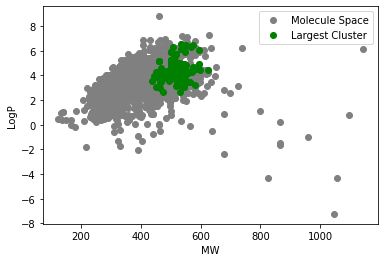

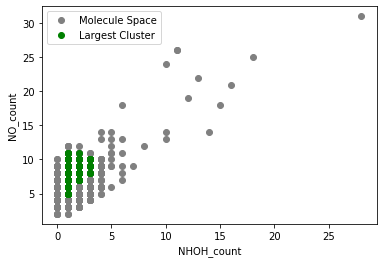

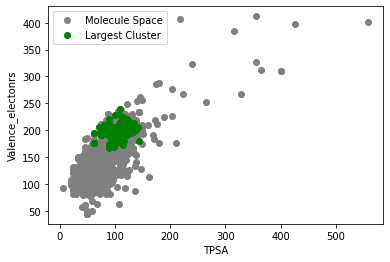

In [64]:
compare_dataframe_pair(df_compounds, df_compounds.iloc[list(max_cluster),], 'MW', 'LogP', subset_name='Largest Cluster')
compare_dataframe_pair(df_compounds, df_compounds.iloc[list(max_cluster),], 'NHOH_count', 'NO_count', subset_name='Largest Cluster')
compare_dataframe_pair(df_compounds, df_compounds.iloc[list(max_cluster),], 'TPSA', 'Valence_electonrs', subset_name='Largest Cluster')

'NHOH_count', 'NO_count'

We may also visualise molecules from the cluster, using RDKit's built-in drawer:

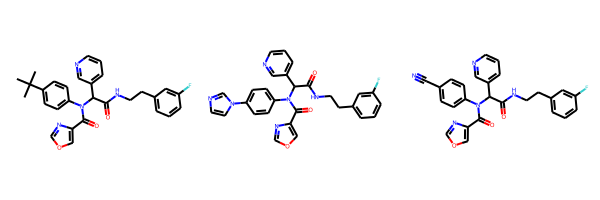

In [65]:
n_molecule = 3
cluster_mols=[]
for i in range(n_molecule):
    m = Chem.MolFromSmiles(df_compounds['SMILES'][max_cluster[i]])
    cluster_mols.append(m)

Draw.MolsToGridImage(cluster_mols)


Here we can see a consistent molecular scafold, with different functional groups on the right hand side of the molecule.